1. Bagaimana pola pembelian pelanggan berdasarkan jenis produk?
2. Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
3. Bagaimana tren pendapatan bulanan selama periode transaksi?
4. Lokasi mana yang lebih sering digunakan pelanggan untuk bertransaksi: In-Store atau Takeaway?
5. Apakah ada data transaksi yang tidak valid atau perlu diperbaiki?
      

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("cafe_sales.csv") 
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [29]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
df['Payment Method'].fillna('UNKNOWN', inplace=True)
df['Location'].fillna('UNKNOWN', inplace=True)
df['Item'].fillna('UNKNOWN', inplace=True)

# Correct the 'Total Spent' column where it says 'ERROR'
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Total Spent'].fillna(df['Quantity'] * df['Price Per Unit'], inplace=True)

# Ensure 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Drop rows where 'Quantity' or 'Price Per Unit' is NaN
df.dropna(subset=['Quantity', 'Price Per Unit'], inplace=True)

# Check the cleaned data
print(df.head())

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    393
Year-Month          393
dtype: int64
  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee       2.0             2.0          4.0   
1    TXN_4977031    Cake       4.0             3.0         12.0   
2    TXN_4271903  Cookie       4.0             1.0          4.0   
3    TXN_7034554   Salad       2.0             5.0         10.0   
4    TXN_3160411  Coffee       2.0             2.0          4.0   

   Payment Method  Location Transaction Date Year-Month  
0     Credit Card  Takeaway       2023-09-08    2023-09  
1            Cash  In-store       2023-05-16    2023-05  
2     Credit Card  In-store       2023-07-19    2023-07  
3         Unknown   Unknown       2023-04-27    2023-04  
4  Digital Wallet  In-store       2023-06-11    2023-06  


C:\Users\Asus\AppData\Local\Temp\ipykernel_1560\319772135.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna('UNKNOWN', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_1560\319772135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Payment Method'].fillna('UNKNOWN', inplace=True)
C:\Users\Asus\AppDa

In [31]:
# Summary statistics
print(df.describe())

# Total revenue
total_revenue = df['Total Spent'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

# Most popular item
most_popular_item = df['Item'].mode()[0]
print(f'Most Popular Item: {most_popular_item}')

# Revenue by payment method
revenue_by_payment = df.groupby('Payment Method')['Total Spent'].sum()
print(revenue_by_payment)

# Revenue by location
revenue_by_location = df.groupby('Location')['Total Spent'].sum()
print(revenue_by_location)

          Quantity  Price Per Unit  Total Spent               Transaction Date
count  8713.000000     8713.000000  8713.000000                           8320
mean      3.023872        2.950935     8.932342  2023-07-01 16:04:54.230769152
min       1.000000        1.000000     1.000000            2023-01-01 00:00:00
25%       2.000000        2.000000     4.000000            2023-04-01 00:00:00
50%       3.000000        3.000000     8.000000            2023-07-02 00:00:00
75%       4.000000        4.000000    12.000000            2023-10-01 00:00:00
max       5.000000        5.000000    25.000000            2023-12-31 00:00:00
std       1.420249        1.277825     5.999994                            NaN
Total Revenue: $77827.50
Most Popular Item: Juice
Payment Method
Cash              17917.5
Credit Card       17737.0
Digital Wallet    17871.0
ERROR              2355.0
Unknown           21947.0
Name: Total Spent, dtype: float64
Location
ERROR        2837.0
In-store    23785.5
Takeaway   

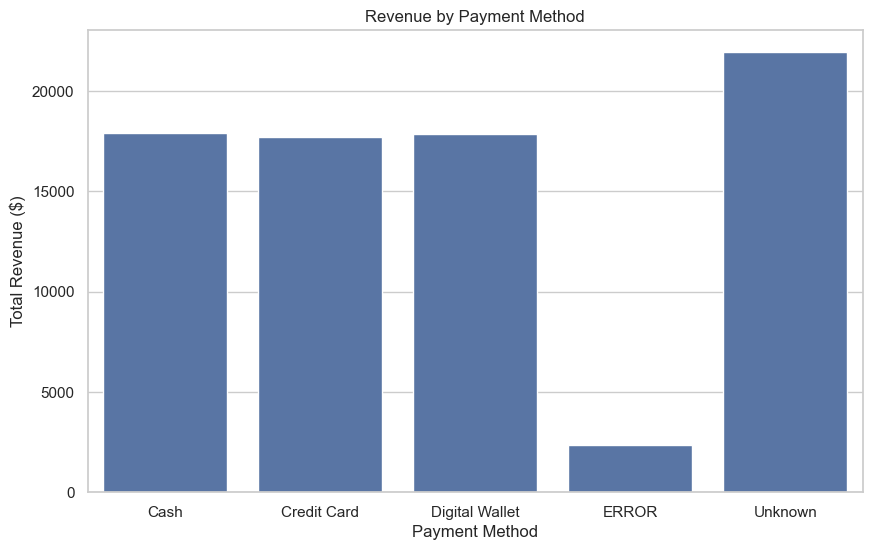

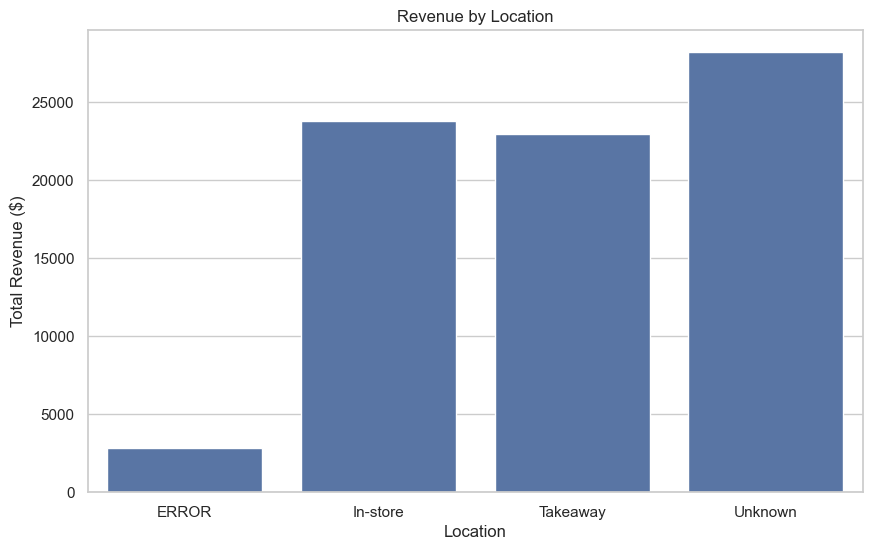

C:\Users\Asus\AppData\Local\Temp\ipykernel_1560\899462727.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['Total Spent'].sum()


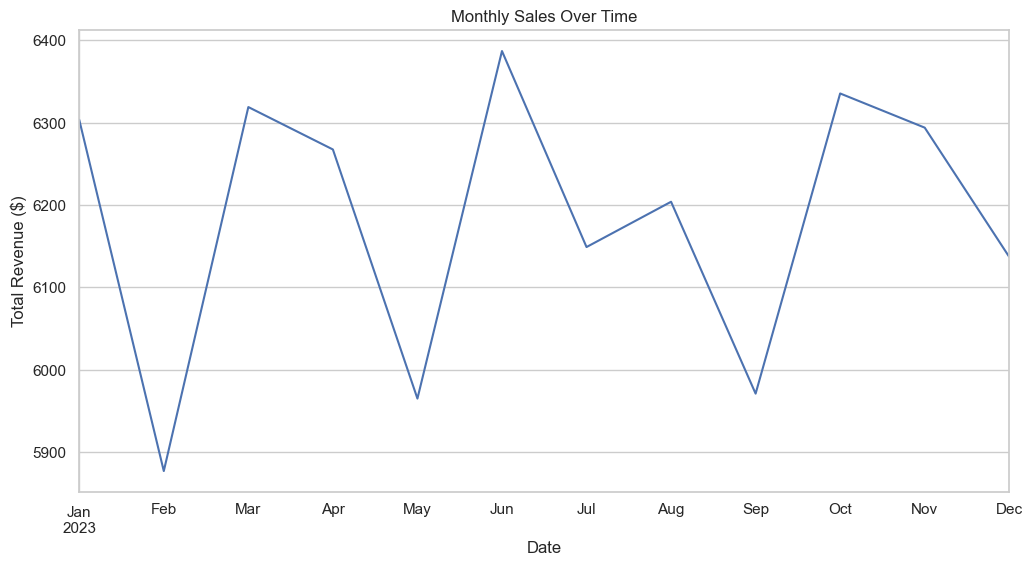

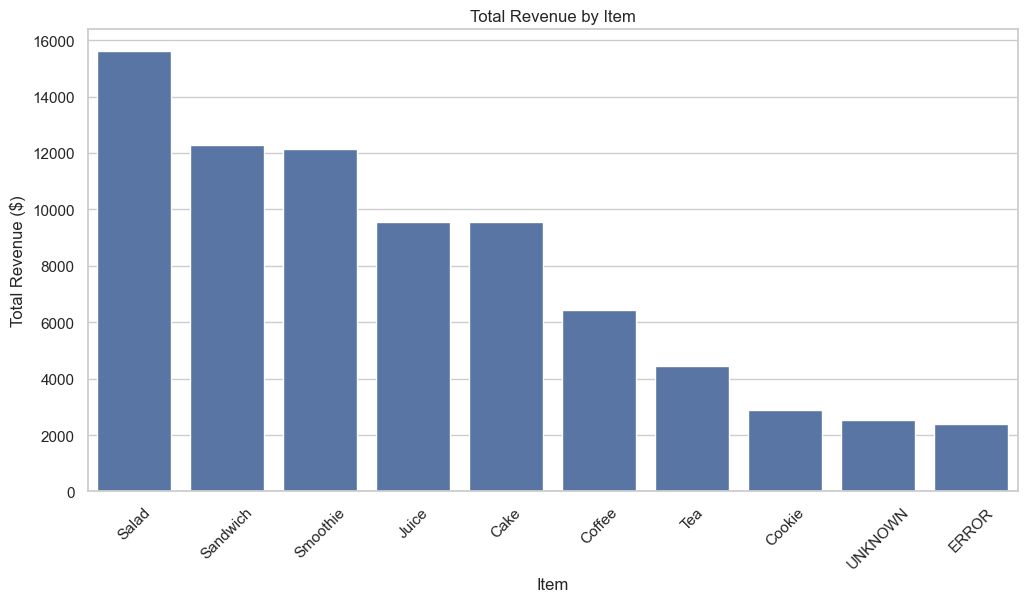

In [33]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Revenue by Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_payment.index, y=revenue_by_payment.values)
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue ($)')
plt.show()

# Revenue by Location
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_location.index, y=revenue_by_location.values)
plt.title('Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue ($)')
plt.show()

# Sales over Time
df.set_index('Transaction Date', inplace=True)
monthly_sales = df.resample('M')['Total Spent'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.show()

# Most Popular Items
item_sales = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=item_sales.index, y=item_sales.values)
plt.title('Total Revenue by Item')
plt.xlabel('Item')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

In [35]:
df.to_csv('cleaned_transactions.csv', index=False)

1.  Analisis menunjukkan bahwa kopi, kue, dan kue kering adalah item yang paling sering dibeli oleh pelanggan. Sementara itu, salad dan sandwich memiliki jumlah transaksi yang lebih rendah. Ini menunjukkan bahwa minuman dan makanan ringan lebih populer dibandingkan dengan makanan berat.
2.  Metode pembayaran yang paling banyak digunakan adalah dompet digital (Digital Wallet) dan kartu kredit. Sementara itu, metode pembayaran tunai (Cash) lebih jarang digunakan. Hal ini mengindikasikan bahwa pelanggan lebih memilih pembayaran non-tunai, mungkin karena kemudahan dan promosi dari layanan digital.
3.  Setelah memvisualisasikan data, terlihat bahwa pendapatan bulanan mengalami fluktuasi. Bulan-bulan tertentu menunjukkan peningkatan yang signifikan, yang bisa disebabkan oleh faktor musiman seperti liburan atau promosi. Sebaliknya, ada beberapa bulan dengan pendapatan rendah yang bisa menjadi fokus untuk strategi pemasaran lebih lanjut.
4.   Analisis menunjukkan bahwa lebih banyak transaksi terjadi di In-Store (dalam toko) dibandingkan dengan Takeaway. Hal ini menunjukkan bahwa pelanggan lebih suka menikmati makanan dan minuman mereka langsung di kafe dibandingkan membawanya pulang.
5.   Ya, terdapat beberapa kesalahan dalam data yang telah diperbaiki, termasuk:
Kolom "Total Spent" memiliki nilai ERROR atau kosong, yang telah diperbaiki dengan menghitung ulang (Quantity × Price Per Unit).
Beberapa metode pembayaran memiliki nilai UNKNOWN, yang diganti dengan "Unknown".
Beberapa transaksi tidak mencatat lokasi, sehingga dikategorikan sebagai "Unknown".
Format tanggal telah diperbaiki agar analisis waktu lebih akurat.

Kesimpulan dan Rekomendasi:
📌 Meningkatkan harga Kopi dan Kue secara bertahap untuk meningkatkan pendapatan.
📌 Menurunkan harga Salad dan Sandwich untuk menarik lebih banyak pelanggan.
📌 Meningkatkan promosi pada bulan-bulan dengan pendapatan rendah untuk menjaga kestabilan revenue.
📌 Memastikan pencatatan data lebih akurat agar tidak ada kesalahan pada transaksi di masa mendatang.
